In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
# mediapipe to extract keypoints and values from the hand regions
import mediapipe as mp

In [4]:
# pip install opencv-python

In [5]:
# pip install tensorflow

In [6]:
# pip install scikit-learn

In [7]:
#pip install mediapipe

## Keypoints using Mediapipe holistic 

In [8]:
# mediapipe holistic for downloading and leveraging the model
mpHolistic = mp.solutions.holistic

# mediapipe drawing utilities for drawing the keypoints on the face and hands
mpDrawing = mp.solutions.drawing_utils


# title to show on the window
title = 'Hand Gesture Recognition using LSTM DL model'

In [9]:
# read the image and make predictions
def mpDetection(image, model):
    
    # convert BGR image format into RGB as open-cv reads the image data in RGB, however, mediapipe detects image in RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # make the image unwritable for saving the memory consumption
    image.flags.writeable = False
    
    # make the prediction using mediapipe
    results = model.process(image)
    
    # make the image writable
    image.flags.writeable = True
    
    # again, convert the image format into original ==> RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [10]:
# draw the landmarks on the face and hands

def drawLandmarks(image, results):
    # mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistic.FACE_CONNECTIONS)
    # draw the landmarks by passing image, landmarks and connections in the draw_landmarks function
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistic.POSE_CONNECTIONS)
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistic.HAND_CONNECTIONS)
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistic.HAND_CONNECTIONS)


In [11]:
# add colors on the landmarks
def drawColorfulLandmarks(image, results):
    
    
    # add grey color on the pose (between wrist and shoulder)
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistic.POSE_CONNECTIONS, 
                               mpDrawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            )
    # add pink color on the landmarks of the left hand
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistic.HAND_CONNECTIONS, 
                              mpDrawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            )
    
    # add blue color on the landmarks of the right hand
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistic.HAND_CONNECTIONS, 
                               mpDrawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )
    

In [12]:
# capture camera
cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# set the mediapipe model
with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop the frames of the webcam
    while cap.isOpened():
        # read the frame/image from the webcam
        ret, frame = cap.read()

        # make the detection
        image, results = mpDetection(frame, holistic)
        # print(results)
        
        # draw the landmarks
        drawColorfulLandmarks(image, results)


        # check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break

        # show the window
        cv2.imshow('Hand Gesture Recognition System with LSTM', image)

        # break the loop when 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break

# release the webcam
cap.release()

# close all OpenCV windows
cv2.destroyAllWindows()

In [13]:
results.face_landmarks.landmark

[x: 0.5428348
y: 0.7330876
z: -0.030705206
, x: 0.5438593
y: 0.6882785
z: -0.048899572
, x: 0.5456217
y: 0.70397884
z: -0.027731344
, x: 0.5437128
y: 0.6477652
z: -0.03224273
, x: 0.54504037
y: 0.6751199
z: -0.05118186
, x: 0.54806256
y: 0.6592521
z: -0.046349123
, x: 0.55667317
y: 0.62341195
z: -0.018008495
, x: 0.5020383
y: 0.61527884
z: 0.028099498
, x: 0.5615771
y: 0.5942073
z: -0.008771119
, x: 0.56347305
y: 0.57795066
z: -0.008762878
, x: 0.57134014
y: 0.526503
z: 0.007002985
, x: 0.5423311
y: 0.7393954
z: -0.029822035
, x: 0.5424068
y: 0.7445979
z: -0.02697568
, x: 0.5430026
y: 0.74700135
z: -0.023160974
, x: 0.5428092
y: 0.7488869
z: -0.024333978
, x: 0.541985
y: 0.7538674
z: -0.026216505
, x: 0.54117435
y: 0.7604418
z: -0.028778305
, x: 0.54066813
y: 0.76791954
z: -0.02836064
, x: 0.54041356
y: 0.7819547
z: -0.020860847
, x: 0.544091
y: 0.695703
z: -0.044754237
, x: 0.53792316
y: 0.6946943
z: -0.03158636
, x: 0.4864974
y: 0.5737386
z: 0.081382476
, x: 0.52430576
y: 0.6283809
z

In [14]:
mpHolistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:

print('Face landmarks number: ', len(results.face_landmarks.landmark) )  # 468

print('Pose landmarks number: ', len(results.pose_landmarks.landmark) )  # 33

print('Right landmarks number: ', len(results.right_hand_landmarks.landmark) )  # 21

# print('Left landmarks number: ', len(results.left_hand_landmarks.landmark) )  # 21



Face landmarks number:  468
Pose landmarks number:  33
Right landmarks number:  21


## Extrack keypoint values

In [17]:
results.pose_landmarks.landmark
print('Length of the pose_landmarks: ', len(results.pose_landmarks.landmark))

Length of the pose_landmarks:  33


In [18]:
# store the x,y,z and visibility in the list of the array
pose = []

for res in results.pose_landmarks.landmark:
    pose.append(np.array([res.x, res.y, res.z, res.visibility]))
    
print(len(pose))

if(len(pose) == len(results.pose_landmarks.landmark)):
    print('Stored x,y,z and visibility in the list of the array as "pose"')
else:
    print('Not stored pose values completely')

33
Stored x,y,z and visibility in the list of the array as "pose"


In [19]:
pose_data = []

# check if pose landmarks are present in the results
if results.pose_landmarks:
    # extract x, y, z, and visibility for each pose landmark
    for landmark in results.pose_landmarks.landmark:
        pose_data.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
else:
    # if no pose landmarks are present, set pose_data to zeros
    pose_data = np.zeros(132)

# convert pose_data to a NumPy array
pose = np.array(pose_data)

len(pose)

132

#### Same thing for the left, right hands and face  landmarks

In [20]:

# mutiple the set of the landmarks by flatten() and if the left hand is not on the frame, then store 0 value where 21 = length  and 3 = x,y,z values
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
print('Length of the left hand landmarks', len(lh))

# mutiple the set of the landmarks by flatten() and if the right hand is not on the frame, then store 0 value where 21 = length  and 3 = x,y,z values
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

print('Length of the right hand landmarks', len(rh))

Length of the left hand landmarks 63
Length of the right hand landmarks 63


In [21]:
# same thing for the face landmarks
len(results.face_landmarks.landmark)

468

#### 468 means the length of the face landmarks is 468 and it needs 468 * 3 = 1404  values if the face is not on the frame

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(468*3)
len(face)

1404

In [23]:
# using the same above concept but wrapping the landmarks of the face, pose, hands in a function and concatating them
def extractKeypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
print('Total keypoints : ', len(extractKeypoints(results)))
extractKeypoints(results)

Total keypoints :  1662


array([ 0.56024694,  0.67395502, -0.64314586, ...,  0.17460489,
        0.31552702, -0.04265717])

#### Concatenating each keypoint from the pose, face, left and right hands i.e 33*4 + 468 * 3 + 21 * 3 + 21 * 3 = 1662

In [25]:
resultTest = extractKeypoints(results)
# saving the data
np.save('0', resultTest)

In [26]:
np.load('0.npy')

array([ 0.56024694,  0.67395502, -0.64314586, ...,  0.17460489,
        0.31552702, -0.04265717])

# Setup folder for collection

In [27]:
# path for the exported data
DATA_PATH = os.path.join('DATA')

# gestures for detecting
gestures = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos of the data, sequence also known as video here i.e 1 hand gesture ==> 30 videos 
sequencesNum = 30

# 30 frames in length for each video  i.e 1 video = 30 frames
sequenceLength = 30





In [28]:

# only three gestures ie 'thanks', 'iloveyou', 'hello'
for gesture in gestures:
    # 30 frames in each sequence/video/gesture
    for sequence in range(sequencesNum):
        try:
            # create 30 folders as 0, 1, 2, 3, ... 29
            os.makedirs(os.path.join(DATA_PATH, gesture, str(sequence)))
        except:
            pass

# Collect keypoint values for testing and training

In [29]:
# create a function to start collecting keypoint values data
def startCollectingKeypoints():
    # capture camera
    cap = cv2.VideoCapture(0) 
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        exit()

    # set the mediapipe model
    with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        # loop through gestures ==> the frames of the webcam
        for gesture in gestures:

            # loop through sequence/video
            for sequence in range(sequencesNum):

                # loop through video length/sequence length
                for frameNum in range(sequenceLength):
                    # read the frame/image from the webcam
                    ret, frame = cap.read()

                     # check if the frame was read successfully
                    if not ret:
                        print("Error: Could not read frame.")
                        break

                    # make the detection of the landmarks using mediapipe
                    image, results = mpDetection(frame, holistic)
                    # print(results)

                    # draw the landmarks
                    drawColorfulLandmarks(image, results)

                    # show the window
                    cv2.imshow(title, image)

                    # logic for waiting each sequence/video data collection ==> break 2 seconds = 30 frames in each video/sequence
                    # frame number 0 is the starting frame and 29 is the ending frame of a video/sequence
                    if frameNum == 0: 
                        # write and style the message text
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(gesture, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # show the screen
                        cv2.imshow(title, image)

                        # break 2 seconds to start collecting 30 frames in a single video/sequence
                        cv2.waitKey(2000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(gesture, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow(title, image)

                    # export keypoints and save it
                    keypoints = extractKeypoints(results)

                    # save the data as created directories in above ie os.makedirs(os.path.join(DATA_PATH, gesture, str(sequence)))
                    npy_path = os.path.join(DATA_PATH, gesture, str(sequence), str(frameNum))
                    np.save(npy_path, keypoints)


                    # break the loop when 'q' key is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                            break

    # release the webcam
    cap.release()

    # close all OpenCV windows
    cv2.destroyAllWindows()





In [30]:
# calling a function to collect data
#startCollectingKeypoints()

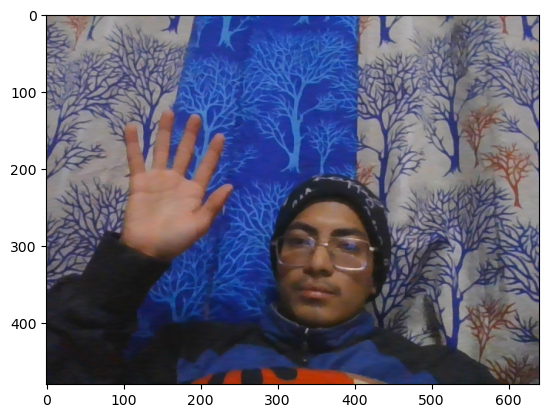

In [31]:
# visualizing the last image/frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


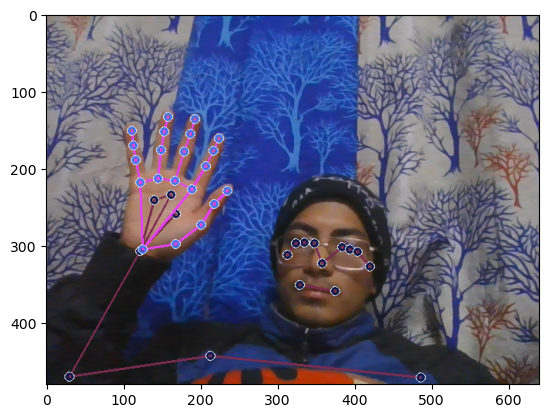

In [32]:
# drawing the landmarks on the frame with styling
drawColorfulLandmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#### Note: There 1662*30 = 49860 total landmarks in each hand gesture so that means 49860 * 3 = 149580 total landmarks from 3 gestures i.e. hello, thanks and iloveyou
#### where, 1662 = Concatenating each keypoint from the pose, face, left and right hands i.e 33*4 + 468 * 3 + 21 * 3 + 21 * 3 = 1662

# Preprocess the data 

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [36]:
# create labels in dictionary
labelMap = {}

# enumerate through gestures list to create the labelMap
for num, label in enumerate(gestures):
    labelMap[label] = num


In [37]:
labelMap

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [38]:
sequences, labels = [], []
# sequences represent feature date or x data and labels represent the lable name or y data

for gesture in gestures:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, gesture))).astype(int):
        # store different frames of that sequence
        window = []
        for frameNum in range(sequenceLength):
            # grab each frame and append to the window
            res = np.load(os.path.join(DATA_PATH, gesture, str(sequence), "{}.npy".format(frameNum)))
            window.append(res)
        # append the window in the sequnces with contain 90 videos and each video has 30 frames
        sequences.append(window)
        labels.append(labelMap[gesture])

In [39]:
np.array(sequences).shape

(90, 30, 1662)

In [40]:
np.array(labels).shape

(90,)

In [42]:
X = np.array(sequences)

In [43]:
X.shape

(90, 30, 1662)

In [44]:
# store binary data of the labels
y = to_categorical(labels).astype(int)

In [45]:
# split training and testing data, only 5% data are testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [48]:
X_train.shape

(85, 30, 1662)